In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
diamonds_train = pd.read_csv('outputs/df_train.csv')
diamonds_train_price = pd.read_csv('outputs/df_train_price.csv')
diamonds_predict=pd.read_csv('outputs/df_test.csv')
submit=pd.read_csv('inputs/sample_submission.csv')

In [3]:
diamonds_train.head()

,carat,cut_numeric,color_numeric,clarity_numeric,depth,table,x,y,z
0,-1.051355,-0.810564,0.352161,-0.033632,0.736126,-0.650176,-1.283716,-1.236438,-1.180531
1,-0.966764,0.982588,0.940769,-0.641579,0.596363,-1.097476,-1.132102,-1.080061,-1.039596
2,-0.839879,-0.810564,1.529377,-0.641579,-1.010919,2.033618,-0.918059,-0.854183,-0.969129
3,-0.839879,0.086012,-0.825055,0.574315,0.037308,0.781181,-0.900222,-0.862870,-0.870475
4,0.217504,-0.810564,1.529377,-0.641579,-0.521746,2.480917,0.330526,0.344710,0.271096


In [4]:
diamonds_predict.head()

,carat,cut_numeric,color_numeric,clarity_numeric,depth,table,x,y,z
0,3.267015,0.978152,-1.416151,-1.232414,-0.666318,-1.554540,2.620734,2.539800,2.446736
1,2.596725,0.978152,-0.830504,-1.232414,0.168508,-0.658049,2.175567,2.234832,2.230593
2,-0.608098,0.978152,-1.416151,-0.627731,-0.040199,-1.554540,-0.495431,-0.491942,-0.492811
3,-1.047976,0.978152,-1.416151,-0.627731,-0.318474,-0.658049,-1.261117,-1.263332,-1.285335
4,0.334497,-2.592365,-0.830504,-0.023048,4.899190,-0.658049,0.332578,0.216660,0.890505


# Split train and test

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(diamonds_train, diamonds_train_price, test_size=0.03)

In [6]:
X_train.head()

,carat,cut_numeric,color_numeric,clarity_numeric,depth,table,x,y,z
30853,-0.628402,0.982588,-1.413663,-0.641579,0.177072,-1.097476,-0.570239,-0.515365,-0.518138
35251,2.543745,-2.603715,0.352161,-1.857474,2.203644,-0.202877,2.016116,1.812919,2.258275
13699,-0.861026,0.982588,0.352161,-0.641579,0.526481,-1.097476,-0.980488,-0.914996,-0.884568
1703,-0.416926,-0.810564,-1.413663,-0.033632,-0.801273,1.139020,-0.240255,-0.211298,-0.306736
25718,-0.586107,0.982588,1.529377,-0.641579,0.037308,-0.650176,-0.489972,-0.506678,-0.489951


In [7]:
y_test.shape

(1214, 1)

# GradientBoostingRegressor

In [8]:
from sklearn.ensemble import GradientBoostingRegressor

In [9]:
reg = GradientBoostingRegressor(n_estimators = 100, loss='huber', min_samples_leaf=6, max_depth=7,
                                max_leaf_nodes=250, min_samples_split=45
                                )

In [10]:
reg.fit(X_train, y_train)

/home/must4in3/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='huber',
                          max_depth=7, max_features=None, max_leaf_nodes=250,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=6, min_samples_split=45,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [11]:
y_pred_GBR= reg.predict(X_test)

In [12]:
y_test_GBR = y_test.copy()
y_test_GBR['y']= y_pred_GBR

In [13]:
y_test_GBR['Price-y'] = abs(y_test_GBR['price']- y_test_GBR['y'])
y_test_GBR.describe()

,price,y,Price-y
count,1214.000000,1214.000000,1214.000000
mean,3827.637562,3837.340282,257.830425
std,3986.894001,3969.752652,423.027941
min,351.000000,309.767673,0.008887
25%,911.000000,893.765940,43.722590
50%,2264.000000,2304.272979,99.278183
75%,5137.250000,5117.472003,286.992021
max,18659.000000,17539.061183,5105.873855


In [ ]:
df_y = pd.DataFrame(y_pred_GBR)

In [ ]:
df_y['id'] = df_y.index

In [ ]:
df_y['price'] = df_y[0]

In [ ]:
df_y = df_y[['id', 'price']]

In [ ]:
df_y

In [ ]:
df_y.to_csv('gaussian_br100-huber-6-7-250-45(8).csv', index=False)

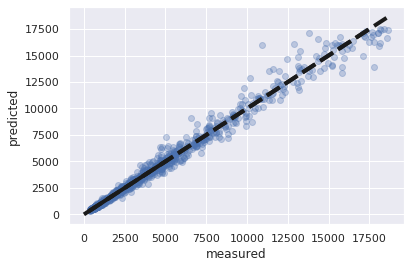

In [14]:
sns.set()
fig, ax = plt.subplots()
ax.scatter( y_test_GBR['price'], y_test_GBR['y'], alpha=.3)
ax.plot([y_test_GBR.min(), y_test_GBR.max()], [y_test_GBR.min(), y_test_GBR.max()], 'k--', lw=4)
ax.set_xlabel('measured')
ax.set_ylabel('predicted')
plt.show()

In [15]:
from sklearn.metrics import mean_squared_error, r2_score
print(f'RMSE={mean_squared_error(y_pred_GBR, y_test)**0.5}')

RMSE=495.25928467429225
